In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
initial = input("Enter the initial of any Indian Company listed in Stock Market: ")

Enter the initial of any Indian Company listed in Stock Market: SBIN


In [3]:
START = input("Enter the start date of training data: ")
END = input("Enter the end date of training data: ")

Enter the start date of training data: 2016-01-01
Enter the end date of training data: 2021-12-31


In [4]:
# df = yf.download(tickers=initial+'.NS',interval='1d',period='7y')
df = yf.download(tickers=initial+'.NS',start=START,end=END)

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,226.531296,233.048080,226.044968,231.783630,223.511627,1592846
2016-01-04,229.741058,232.075424,224.780518,226.968994,218.868820,1655181
2016-01-05,228.476608,229.108841,222.835205,224.294189,216.289459,1645598
2016-01-06,224.683258,226.142242,220.792633,221.278961,213.381836,2010190
2016-01-07,218.847321,218.847321,212.184647,212.719604,205.127945,1866621
...,...,...,...,...,...,...
2021-12-24,201.699997,201.899994,193.000000,193.949997,187.555496,10186277
2021-12-27,190.000000,196.500000,186.399994,195.600006,189.151108,10053249
2021-12-28,197.100006,198.449997,195.649994,197.850006,191.326920,5387946


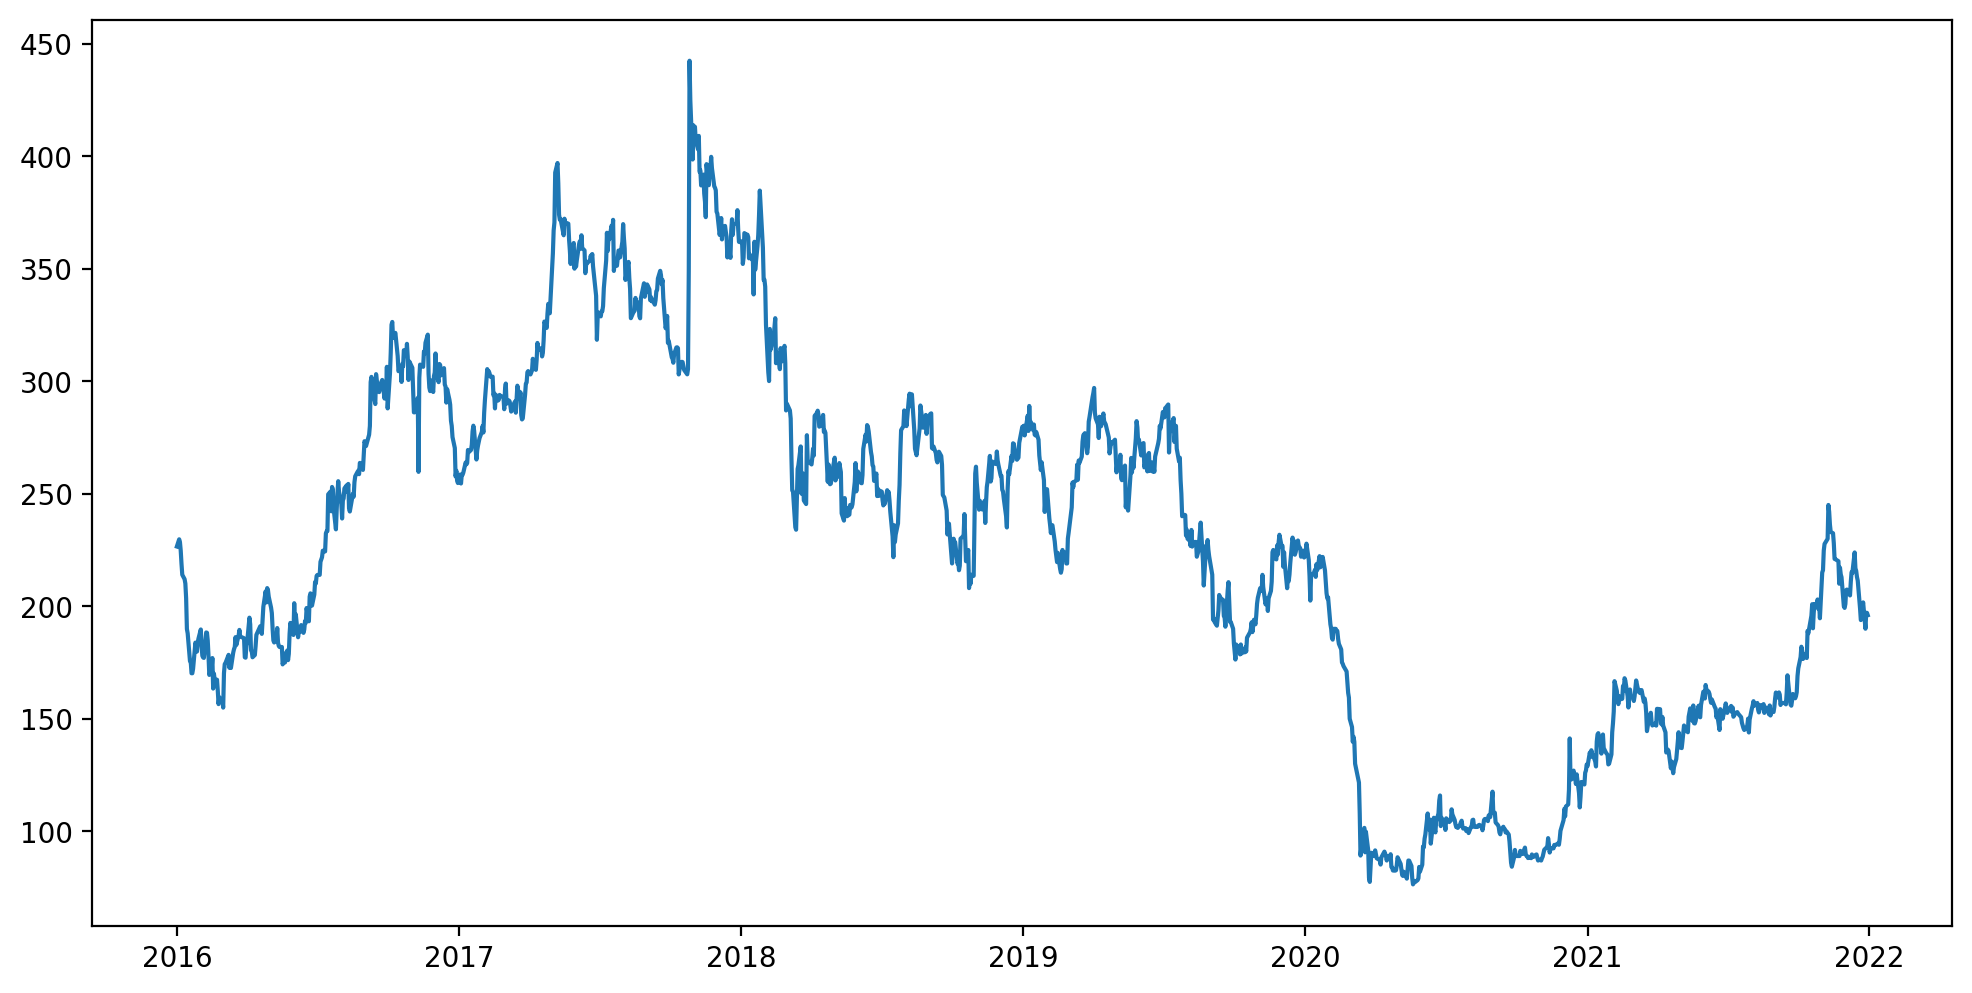

In [6]:
plt.figure(figsize=(12,6),dpi = 200)
plt.plot(df['Open'])

In [7]:
df.dropna(inplace=True)

In [8]:
x = np.array(df['Open'])
x = x.reshape(-1,1)
x

array([[226.53129578],
       [229.74105835],
       [228.47660828],
       ...,
       [197.1000061 ],
       [197.05000305],
       [196.        ]])

In [9]:
# Input from the user
timesteps = int(input("Enter the no. of days model will take into consideration at a time: "))

Enter the no. of days model will take into consideration at a time: 180


In [10]:
X_openseries = []
y = []
for i in range(timesteps,len(df)):
    X_openseries.append(x[i-timesteps:i, 0])
    y.append(x[i, 0])
X_openseries, y = np.array(X_openseries), np.array(y)

In [11]:
X_openseries

array([[226.53129578, 229.74105835, 228.47660828, ..., 296.56243896,
        299.7722168 , 300.55032349],
       [229.74105835, 228.47660828, 224.68325806, ..., 299.7722168 ,
        300.55032349, 292.28277588],
       [228.47660828, 224.68325806, 218.84732056, ..., 300.55032349,
        292.28277588, 296.85424805],
       ...,
       [147.5       , 150.80000305, 147.        , ..., 199.3999939 ,
        201.69999695, 190.        ],
       [150.80000305, 147.        , 143.94999695, ..., 201.69999695,
        190.        , 197.1000061 ],
       [147.        , 143.94999695, 135.        , ..., 190.        ,
        197.1000061 , 197.05000305]])

In [12]:
y

array([292.28277588, 296.85424805, 294.42260742, ..., 197.1000061 ,
       197.05000305, 196.        ])

In [13]:
#Input through the user
days_to_pred = int(input("Enter no. of days for future prediction: "))

Enter no. of days for future prediction: 30


In [14]:
df_real = yf.download(tickers=initial+'.NS',start='2022-01-01',end='2022-02-15')

[*********************100%***********************]  1 of 1 completed


In [15]:
#Function used for predictions
def prediction(x,df,timesteps,model,days_to_pred):
    pred_dataset = x
    final_preds = []
    for i in range(len(df),len(df)+days_to_pred):
        X_test = []
        X_test.append(pred_dataset[i-timesteps:i, 0])
        X_test = np.array(X_test)
        predicted_stock_price = model.predict(X_test)
        pred_dataset = np.append(pred_dataset,[predicted_stock_price],axis=0)
        final_preds.append(predicted_stock_price[0])
        
    plt.plot(final_preds, color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    
    if final_preds[0]<=final_preds[-1]:
        print("Upward trend")
    else:
        print("Downward trend")

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'n_estimators':[64,100,128,200],'max_features':[2,5,10,15],'bootstrap':[True,False],'oob_score':[True,False]}

In [18]:
model = RandomForestRegressor()
grid = GridSearchCV(model,param_grid)
grid.fit(X_openseries,y)

C:\Users\divik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\divik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\divik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\U

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 5, 10, 15],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [35]:
grid.best_params_

{'bootstrap': True, 'max_features': 15, 'n_estimators': 64, 'oob_score': False}

In [36]:
model = RandomForestRegressor(n_estimators=64,max_features=15,oob_score=False)
model.fit(X_openseries,y)

RandomForestRegressor(max_features=15, n_estimators=64)

Upward trend


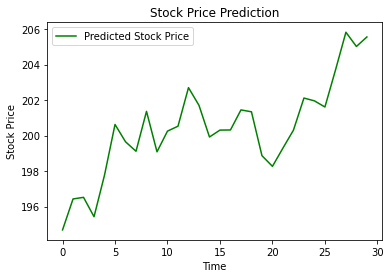

In [37]:
prediction(x,df,timesteps,model,days_to_pred)

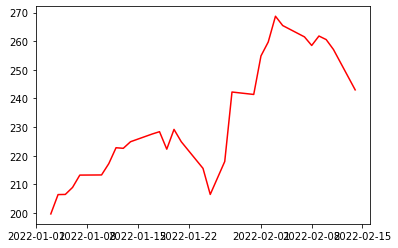

In [38]:
plt.plot(df_real['Open'], color='red',label='Real Stock Price')

In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:
param_grid={'n_estimators':[40,50,70,90,100]}

In [41]:
model = AdaBoostRegressor()
grid = GridSearchCV(model,param_grid)

In [42]:
grid.fit(X_openseries,y)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [40, 50, 70, 90, 100]})

In [43]:
grid.best_params_

{'n_estimators': 100}

In [50]:
model = AdaBoostRegressor(n_estimators=70)

In [51]:
model.fit(X_openseries,y)

AdaBoostRegressor(n_estimators=70)

Upward trend


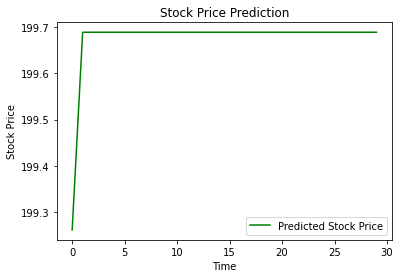

In [52]:
prediction(x,df,timesteps,model,days_to_pred)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
param_grid = {"n_estimators":[50,75,100,125],'max_depth':[4,5,6],'learning_rate':[0.15,0.2,0.25]}

In [69]:
pre_model = GradientBoostingRegressor()

In [70]:
grid = GridSearchCV(pre_model,param_grid)

In [71]:
grid.fit(X_openseries,y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.15, 0.2, 0.25],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [50, 75, 100, 125]})

In [72]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}

In [64]:
model = GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.2)

In [65]:
model.fit(X_openseries,y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5)

Upward trend


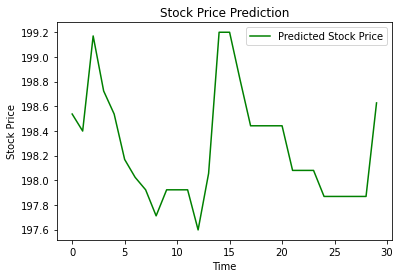

In [66]:
prediction(x,df,timesteps,model,days_to_pred)

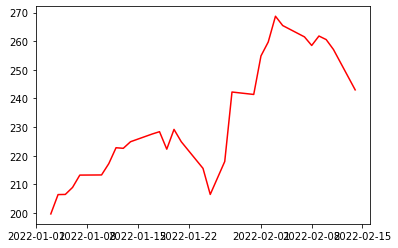

In [67]:
plt.plot(df_real['Open'], color='red',label='Real Stock Price')